In [1]:
import numpy as np
import pandas as pd
import random
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/project.kaggle"

In [4]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [6]:
!kaggle datasets download -d joebeachcapital/defungi

 99% 147M/149M [00:00<00:00, 214MB/s]
100% 149M/149M [00:00<00:00, 203MB/s]


In [7]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: H1/H1_94a_2.jpg         
  inflating: H1/H1_94a_3.jpg         
  inflating: H1/H1_94a_4.jpg         
  inflating: H1/H1_94a_5.jpg         
  inflating: H1/H1_94a_6.jpg         
  inflating: H1/H1_94a_7.jpg         
  inflating: H1/H1_94a_8.jpg         
  inflating: H1/H1_94a_9.jpg         
  inflating: H1/H1_94b_1.jpg         
  inflating: H1/H1_94b_2.jpg         
  inflating: H1/H1_94b_3.jpg         
  inflating: H1/H1_94b_4.jpg         
  inflating: H1/H1_94b_5.jpg         
  inflating: H1/H1_94b_6.jpg         
  inflating: H1/H1_94b_7.jpg         
  inflating: H1/H1_94b_8.jpg         
  inflating: H1/H1_94b_9.jpg         
  inflating: H1/H1_95a_1.jpg         
  inflating: H1/H1_95a_10.jpg        
  inflating: H1/H1_95a_11.jpg        
  inflating: H1/H1_95a_12.jpg        
  inflating: H1/H1_95a_13.jpg        
  inflating: H1/H1_95a_14.jpg        
  inflating: H1/H1_95a_15.jpg        
  inflating: H1/H1_95a_16.jpg        

In [10]:
import os

# Define the folder name
folder_name = "Fungi dataset"

# Define the path to the folder in your mounted Google Drive
folder_path = '/content/drive/MyDrive/' + folder_name

# Check if the folder already exists, and create it if not
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print("Folder '{}' created in your Google Drive.".format(folder_name))
else:
    print("Folder '{}' already exists in your Google Drive.".format(folder_name))


Folder 'Fungi dataset' created in your Google Drive.


In [15]:
import shutil
shutil.move('/content/drive/MyDrive/H6','/content/drive/MyDrive/Fungi dataset')

'/content/drive/MyDrive/Fungi dataset/H6'

In [16]:
import os
import csv

# Define the root directory of your dataset
dataset_root = '/content/drive/MyDrive/Fungi dataset'

# Create a list to store image paths and labels
data = []

# Define a mapping of class names to label codes
class_mapping = {
    'H1': 0,
    'H2': 1,
    'H3': 2,
    'H4': 3,
    'H5': 4,
}

# Iterate through the subdirectories in the dataset root
for class_name in os.listdir(dataset_root):
    class_dir = os.path.join(dataset_root, class_name)
    if os.path.isdir(class_dir):
        label = class_mapping.get(class_name, -1)  # Get the label code
        if label != -1:
            for image_name in os.listdir(class_dir):
                if image_name.endswith(('.jpg', '.jpeg', '.png')):
                    image_path = os.path.join(class_dir, image_name)
                    data.append([image_path, label])

# Shuffle the dataset
random.shuffle(data)

# Define the path to the CSV file
csv_file = 'Fungi_dataset.csv'

# Write the data to a CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image_path', 'label'])
    writer.writerows(data)

print(f'CSV file "{csv_file}" has been created.')



CSV file "Fungi_dataset.csv" has been created.


In [17]:
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/content/drive/MyDrive/Fungi dataset/H2/H2_14a...,1
1,/content/drive/MyDrive/Fungi dataset/H1/H1_46a...,0
2,/content/drive/MyDrive/Fungi dataset/H2/H2_70c...,1
3,/content/drive/MyDrive/Fungi dataset/H3/H3_1a_...,2
4,/content/drive/MyDrive/Fungi dataset/H2/H2_11a...,1
...,...,...
8370,/content/drive/MyDrive/Fungi dataset/H2/H2_60a...,1
8371,/content/drive/MyDrive/Fungi dataset/H1/H1_54a...,0
8372,/content/drive/MyDrive/Fungi dataset/H2/H2_65a...,1
8373,/content/drive/MyDrive/Fungi dataset/H1/H1_1a_...,0


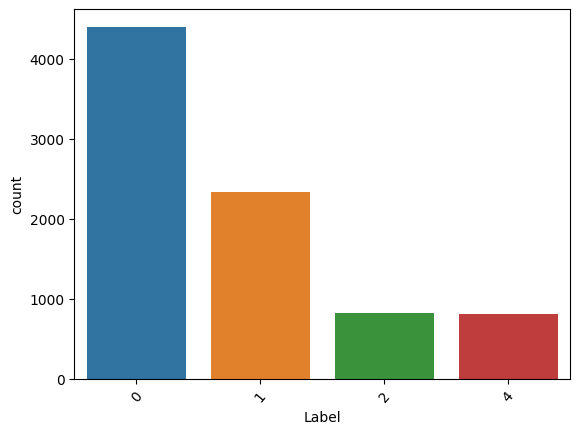

In [18]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

In [19]:
train_data_dir = '/content/drive/MyDrive/Fungi dataset'
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)


Found 9114 files belonging to 5 classes.
Using 7292 files for training.
Found 9114 files belonging to 5 classes.
Using 1822 files for validation.


In [20]:
class_names = train.class_names
class_names

['H1', 'H2', 'H3', 'H5', 'H6']

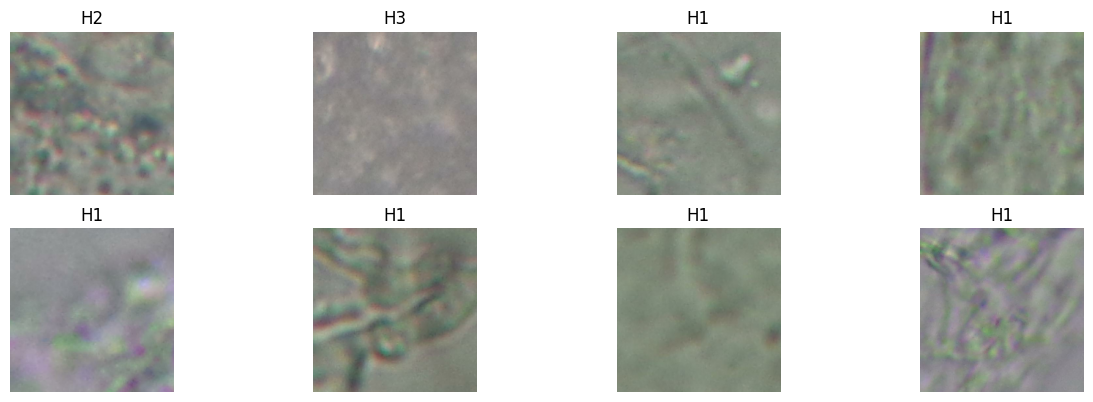

In [21]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
base_model = tf.keras.applications.VGG19(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(5,activation=tf.nn.softmax))
keras_model.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 5)                 125445    
                                                                 
Total params: 20149829 (76.87 MB)
Trainable params: 125445 (490.02 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


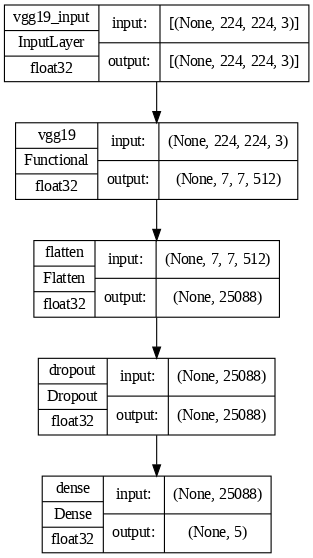

In [ ]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

In [ ]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=20,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/20
228/228 [==============================] - 1544s 7s/step - loss: 4.5660 - accuracy: 0.5775 - val_loss: 1.8985 - val_accuracy: 0.7064
Epoch 2/20
228/228 [==============================] - 46s 200ms/step - loss: 2.9027 - accuracy: 0.7050 - val_loss: 1.8206 - val_accuracy: 0.7986
Epoch 3/20
228/228 [==============================] - 45s 196ms/step - loss: 2.5162 - accuracy: 0.7388 - val_loss: 1.4940 - val_accuracy: 0.8227
Epoch 4/20
228/228 [==============================] - 46s 202ms/step - loss: 2.1696 - accuracy: 0.7726 - val_loss: 0.9971 - val_accuracy: 0.8606
Epoch 5/20
228/228 [==============================] - 46s 198ms/step - loss: 2.0074 - accuracy: 0.7916 - val_loss: 1.2789 - val_accuracy: 0.8189
Epoch 6/20
228/228 [==============================] - 45s 197ms/step - loss: 1.9571 - accuracy: 0.7966 - val_loss: 1.3415 - val_accuracy: 0.8710
Epoch 7/20
228/228 [==============================] - 47s 202ms/step - loss: 1.6173 - accuracy: 0.8247 - val_loss: 1.3593 - val_acc

In [ ]:
keras_model.save('/content/drive/MyDrive/VGG19.h5')

In [ ]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

57/57 [==============================] - 10s 146ms/step - loss: 0.9853 - accuracy: 0.8963
Test Loss = 0.9852526783943176
Test Accuracy = 0.896267831325531


In [ ]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,4.565997,0.577482,1.898456,0.706367
1,2.902728,0.705019,1.820604,0.798573
2,2.516187,0.738755,1.494023,0.822722
3,2.169638,0.772628,0.997083,0.860593
4,2.007360,0.791552,1.278933,0.818880
5,1.957092,0.796626,1.341469,0.871021
6,1.617262,0.824739,1.359346,0.825467
7,1.869256,0.813631,1.117287,0.883644
8,1.819009,0.821037,0.985252,0.896268
9,1.795478,0.835436,1.158845,0.902305


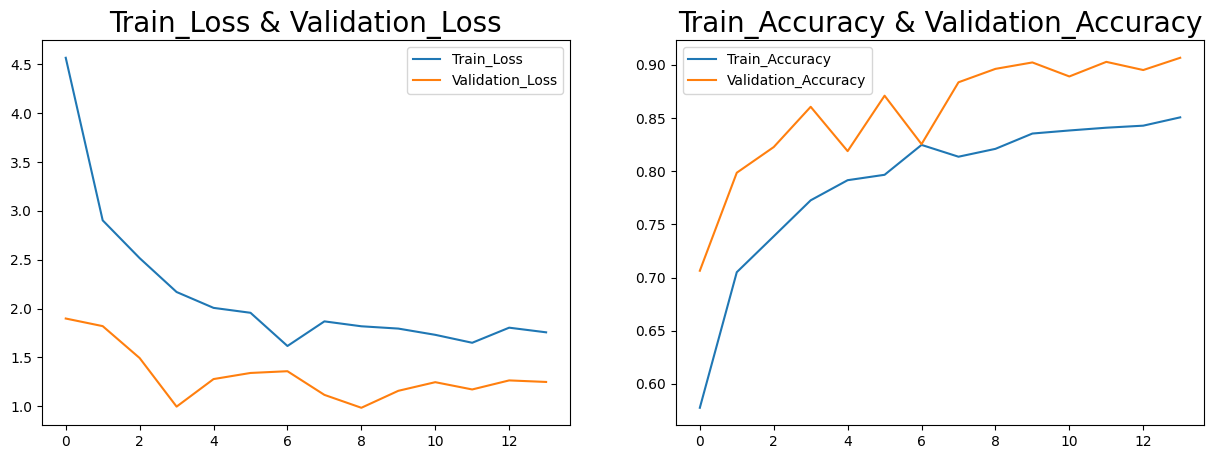

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

#Model 1

#Defining the Convolutional Neural Network
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), input_shape = (224,224,3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2, 2)))
#model1.add(Dropout(0.2))


model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2, 2)))



model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
#model1.add(Dropout(0.5))
model1.add(Dense(75, activation = 'softmax'))

model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam',metrics =['acc'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                                                        

In [28]:
epochs=100
history1 = model1.fit(train, batch_size = 128, epochs = epochs, verbose =1, validation_data = validation)

Epoch 1/100
228/228 [==============================] - 27s 114ms/step - loss: 0.0570 - acc: 0.9833 - val_loss: 0.7702 - val_acc: 0.8348
Epoch 2/100
228/228 [==============================] - 26s 113ms/step - loss: 0.0324 - acc: 0.9897 - val_loss: 0.3838 - val_acc: 0.9308
Epoch 3/100
228/228 [==============================] - 28s 122ms/step - loss: 0.0299 - acc: 0.9911 - val_loss: 1.0088 - val_acc: 0.8024
Epoch 4/100
228/228 [==============================] - 27s 116ms/step - loss: 0.0231 - acc: 0.9929 - val_loss: 0.7232 - val_acc: 0.8814
Epoch 5/100
228/228 [==============================] - 27s 115ms/step - loss: 0.0157 - acc: 0.9941 - val_loss: 0.7882 - val_acc: 0.8705
Epoch 6/100
228/228 [==============================] - 26s 114ms/step - loss: 0.0494 - acc: 0.9860 - val_loss: 0.5066 - val_acc: 0.9045
Epoch 7/100
228/228 [==============================] - 26s 114ms/step - loss: 0.0565 - acc: 0.9820 - val_loss: 0.4718 - val_acc: 0.9188
Epoch 8/100
228/228 [===========================

In [29]:
model1.save('/content/drive/MyDrive')

In [30]:
score, acc = model1.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

57/57 [==============================] - 4s 68ms/step - loss: 0.7481 - acc: 0.9319
Test Loss = 0.7480524778366089
Test Accuracy = 0.9319429397583008
